In [1]:
import numpy as np
import scipy.integrate
import scipy.special
import matplotlib.pyplot as plt

In [2]:
# define a normal distibution function
normal_fun = lambda x, mu, sig=1: 1/(sig*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mu)**2/sig**2)

In [3]:
x = np.linspace(-10,10,1001)
mu_p=1 # mean of psi_p
mu_n=-1 # mean of psi_n

# define our functions
psi_p = lambda x: normal_fun(x, mu_p)
psi_n = lambda x: normal_fun(x, mu_n)

D = 16e12 # cost of bad event happening
T = 30e9 # cost of treatment
DTR = D/T # ratio of bad event cost to treatment cost
# DTR = 
P_p = 0.01 # background probability of bad event happening

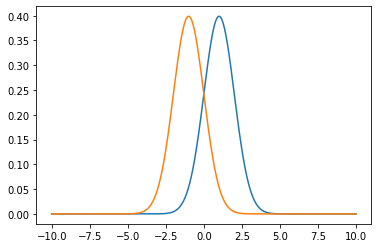

In [4]:
# plot the two distibutions, to get a feel for what they look like

plt.plot(x, psi_p(x))
plt.plot(x, psi_n(x))

In [5]:
def t_fun(DTR=DTR, P_p=P_p,mu_p=mu_p, mu_n=mu_n):
    # this function calculates the optimal threshold value, assuming that 
    # the distributions are normal distributions with standard deviations of 1
    # and means of mu_p and mu_n
    return 1 / (mu_p - mu_n) * np.log((1 - P_p) /( P_p * (2 * DTR - 1))) + 0.5 * (mu_p**2 - mu_n**2)/(mu_p - mu_n)
    
def t_factor(DTR=DTR, P_p=P_p):
    # this function calculates the factor which is equal to
    # psi_p(t)/psi_n(t)
    # this depends only on D/T (= DTR) and P_p
    return (1 - P_p) / (P_p * (2 * DTR - 1))


In [6]:
# This EV_fun is used for arbitary distributions psi_p and psi_n, and separate values for D and T

# def EV_fun(t, D=D, T=T, P_p=P_p, psi_p=psi_p, psi_n=psi_n):
#     '''Calculates the expected value, as a function of the threshold t.
    
#     Used to see how the expected value changes if we have different values
#     for the threshold.
#     This function numerically integrates over the distributions
#     and uses these probabilties to calculate the expected value.
    
#     Args:
#         t: the threshold value, this is not the 'optimal value'
#         D: the cost of the bad event
#         T: the cost of the treatment
#         P_p: the background probability of the bad event
#         psi_p: the distribution over the measured variable given that 
#             the bad event happens
#         psi_n: the distribution over the measured variable given that 
#             the bad event doesn't happen
#     '''
#     EV_val = P_p * (D - T) * scipy.integrate.quad(psi_p, t, np.inf)[0]
#     EV_val += (1 - P_p) * (-T) * scipy.integrate.quad(psi_n, t, np.inf)[0]
#     EV_val += P_p * (-D) * scipy.integrate.quad(psi_p, -np.inf, t)[0]
#     return EV_val


In [7]:
# def EV_fun(t, DTR=DTR, P_p=P_p, psi_p=psi_p, psi_n=psi_n):
#     '''Calculates the expected value, as a function of the threshold t.
    
#     Used to see how the expected value changes if we have different values
#     for the threshold.
#     This function numerically integrates over the distributions
#     and uses these probabilties to calculate the expected value.
    
#     Args:
#         t: the threshold value, this is not the 'optimal value'
#         DTR: the disease-treatment ratio D/T
#         P_p: the background probability of the bad event
#         psi_p: the distribution over the measured variable given that 
#             the bad event happens
#         psi_n: the distribution over the measured variable given that 
#             the bad event doesn't happen
#     '''
#     EV_val = P_p * (DTR - 1) * scipy.integrate.quad(psi_p, t, np.inf)[0]
#     EV_val += (1 - P_p) * (-1) * scipy.integrate.quad(psi_n, t, np.inf)[0]
#     EV_val += P_p * (-DTR) * scipy.integrate.quad(psi_p, -np.inf, t)[0]
#     return EV_val

In [8]:
def EV_fun(t, DTR=DTR, P_p=P_p, mu_p=mu_p, mu_n=mu_n):
    '''Calculates the expected value, as a function of the threshold t.
    
    Used to see how the expected value changes if we have different values
    for the threshold.
    This function assumes that our distributions over the measured variable
    are normal distibutions with standard deviations of 1 (but different means).
    Rather than numerically intergrating (which is slow) we can use error
    functions, which give us the integrals over normal distibutions,
    which is a lot faster. This gives is the probabilties which are used 
    to calcuate the expected value.
    
    Args:
        t: the threshold value, this is not the 'optimal value'
        DTR: the disease-treatment ratio D
        P_p: the background probability of the bad event
        psi_p: the distribution over the measured variable given that 
            the bad event happens
        psi_n: the distribution over the measured variable given that 
            the bad event doesn't happen
    '''
    EV_val = P_p * (DTR - 1) * (0.5 - 0.5 * scipy.special.erf((t - mu_p)/np.sqrt(2)))
    EV_val += (1 - P_p) * (-1) * (0.5 - 0.5 * scipy.special.erf((t - mu_n)/np.sqrt(2)))
    EV_val += P_p * (-DTR) * (0.5 + 0.5 * scipy.special.erf((t - mu_p)/np.sqrt(2)))
#     EV_val += P_p * DTR
    return EV_val

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


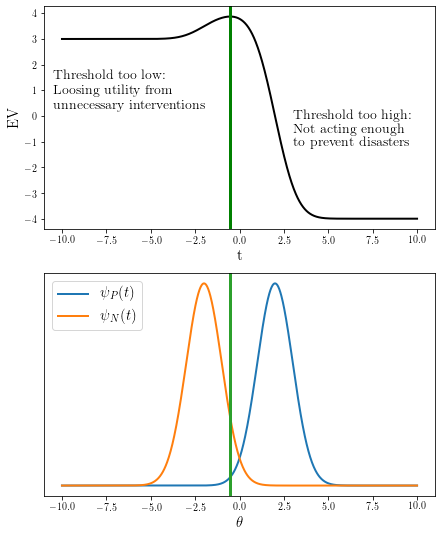

In [10]:
mu_p=2 # mean of the psi_p distribution
mu_n=-2 # mean of the psi_n distribution
psi_p = lambda x: normal_fun(x, mu_p)
psi_n = lambda x: normal_fun(x, mu_n)
DTR= 400 # ratio of cost of disease to cost of treatment
P_p = 0.01 # probability that bad event occurs

t_vals= np.linspace(-10,10,1000) # range of threshold values
# Calculate the EV for each threshold value
EV = [EV_fun(t, DTR=DTR,P_p=P_p, mu_p=mu_p, mu_n=mu_n) for t in t_vals]

#calculate the optimal threshold value
t_best= t_fun(DTR=DTR,P_p=P_p, mu_p=mu_p, mu_n=mu_n)



fig = plt.figure(figsize=(7,9))

# plot the EV as a function of the threshold value
# with a line showing the optimal threshold
fig.add_subplot(2,1,1)
plt.plot(t_vals, EV,'k', linewidth=2)

yl = plt.ylim()
plt.plot([t_best, t_best], yl, 'g', linewidth=3)
plt.ylabel('EV', fontsize=15)
plt.xlabel('t', fontsize=15)
plt.ylim(yl)
text1='Threshold too low:\n Loosing utility from \n unnecessary interventions'
plt.text(-10.5,0.3,text1, fontsize=14)
text2='Threshold too high:\n Not acting enough \n to prevent disasters'
plt.text(3,-1.2,text2, fontsize=14)

# plot the distibutions of psi_n and psi_p
# with a line showing where the optimal threshold is 
fig.add_subplot(2,1,2)

plt.plot(x, psi_p(x), linewidth=2)
plt.plot(x, psi_n(x), linewidth=2)
yl = plt.ylim()
plt.plot([t_best, t_best], yl, linewidth=3)
plt.ylim(yl)
ax = plt.gca()
ax.set_yticklabels([])
ax.set_yticks([])
plt.xlabel(r'$\theta$', fontsize=15)
plt.legend(['$\psi_P(t)$', '$\psi_N(t)$'], fontsize=15, loc = 'upper left')


plt.savefig('EV_plot1.png', bbox_inches='tight', dpi=300)

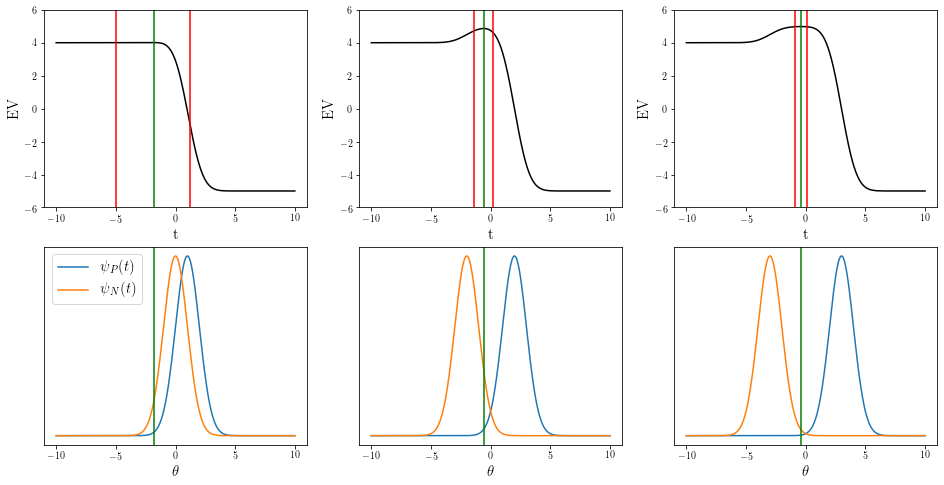

In [11]:
mu_p=1
mu_n=-1
psi_p = lambda x: normal_fun(x, mu_p)
psi_n = lambda x: normal_fun(x, mu_n)

DTR = 500
P_p = 0.01

fig=plt.figure(figsize=(16,8))

mu_p_vals = [1, 2, 3]
mu_n_vals = [0, -2, -3]

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for ii in range(3):
    mu_p=mu_p_vals[ii]
    mu_n=mu_n_vals[ii]
    t_best= t_fun(DTR=DTR,P_p=P_p, mu_p=mu_p, mu_n=mu_n)

    t_vals= np.linspace(-10,10,1000)
    EV = [EV_fun(t, DTR=DTR,P_p=P_p, mu_p=mu_p, mu_n=mu_n) for t in t_vals]
    psi_p = lambda x: normal_fun(x, mu_p)
    psi_n = lambda x: normal_fun(x, mu_n)
    
    t_1 = t_fun(DTR=DTR, P_p=P_p/20, mu_p=mu_p, mu_n=mu_n)
    t_2 = t_fun(DTR=DTR, P_p=P_p*20, mu_p=mu_p, mu_n=mu_n)
    
    fig.add_subplot(2,3,ii+1)
    plt.plot(t_vals, EV, 'k')
    yl = (-6,6)
    plt.plot([t_best, t_best], yl, 'g')
    plt.plot([t_1, t_1], yl,'r')
    plt.plot([t_2, t_2], yl,'r')
    plt.ylim(yl)
    plt.ylabel('EV', fontsize=15)
    plt.xlabel('t', fontsize=15)

    ax = plt.gca()


    fig.add_subplot(2,3,ii+4)
    plt.plot(t_vals, psi_p(t_vals))
    plt.plot(t_vals, psi_n(t_vals))
    yl = plt.ylim()
    plt.plot([t_best, t_best], yl, 'g')
    plt.ylim(yl)
    ax = plt.gca()
    ax.set_yticklabels([])
    ax.set_yticks([])
    plt.xlabel('t', fontsize=15)
    plt.xlabel(r'$\theta$', fontsize=15)

    if ii==0:
        plt.legend(['$\psi_P(t)$', '$\psi_N(t)$'], fontsize=15, loc = 'upper left')
        
        
plt.savefig('EV_plot2.png', bbox_inches='tight', dpi=300)


In [12]:
def change_odds(p, factor):
    # converts probability to odds ratio
    # changes the odds ratio by the factor,
    # converts back to probability
    odds = p/(1-p)
    odds *= factor
    
    return odds / (odds + 1)
    

Text(0.5, 0, '$P_p$')

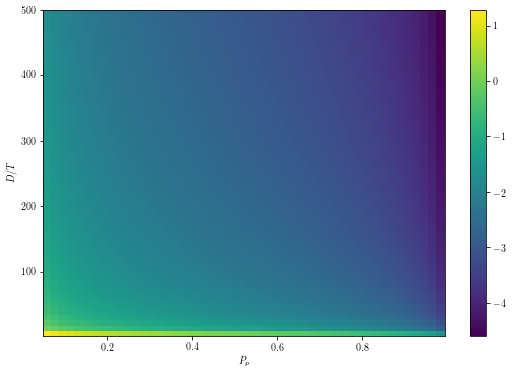

In [13]:
DTR_vals = np.linspace(1, 500, 61)#.reshape((101,1))
Pp_vals = np.linspace(0.05, 0.995, 51)#.reshape((201,1))


DTR_grid , Pp_grid = np.meshgrid(DTR_vals, Pp_vals)
tfactor_grid = t_factor(DTR_grid, Pp_grid)

fig = plt.figure(figsize=(9,6))
plt.pcolor(Pp_vals, DTR_vals, np.log10(tfactor_grid.T))
plt.colorbar()

plt.ylabel("$D/T$")
plt.xlabel("$P_p$")

In [18]:
# define the range of parameters to test
DTR_vals = np.logspace(0, 5, 101)
odds_vals = np.logspace(-3, np.log10(1 - 1e-3), 101)
DTR_grid, odds_grid = np.meshgrid(DTR_vals, odds_vals)

# define the probability distributions
mu_p = 1
mu_n = -1
psi_p = lambda x: normal_fun(x, mu_p)
psi_n = lambda x: normal_fun(x, mu_n)

# the factor by which we underestimate/overestimate
# the probability or cost ratio
factor1 = 20


t_vals = np.zeros((len(odds_vals), len(DTR_vals)))
EV_vals= np.zeros(t_vals.shape)
EV_diff_pp1= np.zeros(t_vals.shape)
EV_diff_dtr1= np.zeros(t_vals.shape)
EV_diff_pp2= np.zeros(t_vals.shape)
EV_diff_dtr2= np.zeros(t_vals.shape)

for ii, odds_val in enumerate(odds_vals):

    for jj, DTR_val in enumerate(DTR_vals):
        
            Pp_val = odds_val / (odds_val + 1) # probability of bad event


            Pp_new = change_odds(Pp_val, 1/factor1) # probability with odds modified down by factor1
            DTR_new = DTR_val / factor1 # cost underestimated by factor1
            
            # The optimal threshold values for each DTR and P_P value
            t_vals[ii, jj] = t_fun(DTR=DTR_val, P_p=Pp_val, mu_p=mu_p, mu_n=mu_n)

            # The threshold value for each DTR or P_P, where we have underestimated one of these
            tval_pp = t_fun(DTR=DTR_val, P_p=Pp_new, mu_p=mu_p, mu_n=mu_n)
            tval_dtr = t_fun(DTR=DTR_new, P_p=Pp_val, mu_p=mu_p, mu_n=mu_n)

            # calculate the optimal EV value, and the EV when we underestimate something
            EV_vals[ii, jj] = EV_fun(t_vals[ii, jj], DTR=DTR_val, P_p=Pp_val, mu_p=mu_p, mu_n=mu_n)
            EV_diff_pp1[ii, jj] = EV_fun(tval_pp, DTR=DTR_val, P_p=Pp_val, mu_p=mu_p, mu_n=mu_n) - EV_vals[ii, jj] 
            EV_diff_dtr1[ii, jj] = EV_fun(tval_dtr, DTR=DTR_val, P_p=Pp_val, mu_p=mu_p, mu_n=mu_n) - EV_vals[ii, jj] 
            
            
            Pp_new = change_odds(Pp_val, factor1) # probability with odds modified down by factor1
            DTR_new = DTR_val * factor1 # cost underestimated by factor1
            
            # The threshold value for each DTR or P_P, where we have overestimated one of these
            tval_pp = t_fun(DTR=DTR_val, P_p=Pp_new, mu_p=mu_p, mu_n=mu_n)
            tval_dtr = t_fun(DTR=DTR_new, P_p=Pp_val, mu_p=mu_p, mu_n=mu_n)

            # calculate the EV when we over estimate P_p or DTR
            EV_diff_pp2[ii, jj] = EV_fun(tval_pp, DTR=DTR_val, P_p=Pp_val, mu_p=mu_p, mu_n=mu_n) - EV_vals[ii, jj] 
            EV_diff_dtr2[ii, jj] = EV_fun(tval_dtr, DTR=DTR_val, P_p=Pp_val, mu_p=mu_p, mu_n=mu_n) - EV_vals[ii, jj] 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


Text(0.5, 0, '$P_P/(1-P_P)$')

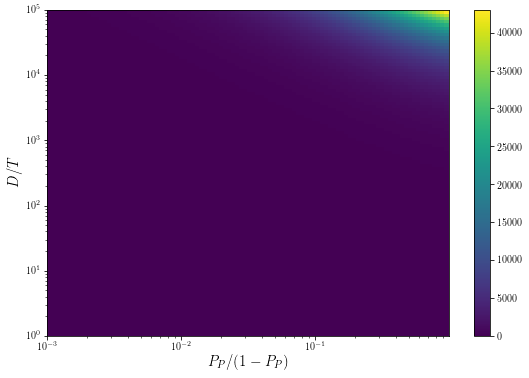

In [19]:
fs = 15

fig = plt.figure(figsize=(9,6))
plt.pcolor(odds_vals, DTR_vals, (EV_vals).T)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.colorbar()
# plt.contour(Pp_vals, DTR_vals, np.log10(EV_vals).T, [0])

plt.ylabel("$D/T$", fontsize=fs)
plt.xlabel("$P_P/(1-P_P)$", fontsize=fs)

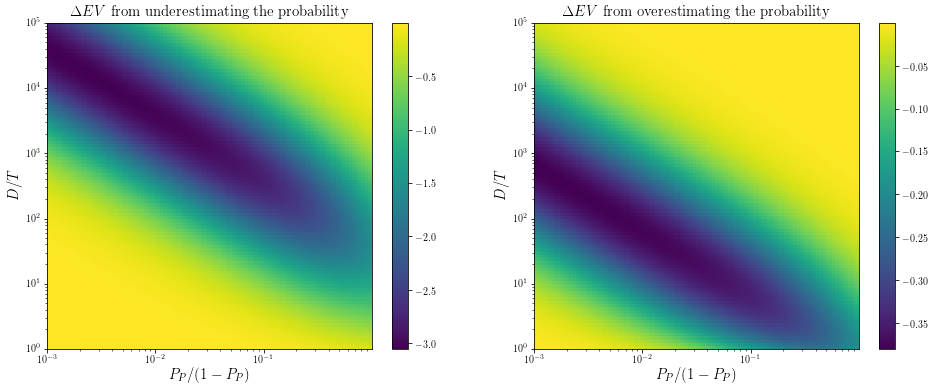

In [20]:
fig = plt.figure(figsize=(16,6))
fig.add_subplot(1, 2, 1)
plt.pcolor(odds_vals, DTR_vals, (EV_diff_pp1).T)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.colorbar()
# plt.contour(Pp_vals, DTR_vals, EV_diff_pp1.T, [0])

plt.ylabel("$D/T$", fontsize=fs)
plt.xlabel("$P_P/(1-P_P)$", fontsize=fs)
plt.title("$\Delta EV$ from underestimating the probability", fontsize=fs)

fig.add_subplot(1, 2, 2)
plt.pcolor(odds_vals, DTR_vals, (EV_diff_pp2).T)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.colorbar()
# plt.contour(Pp_vals, DTR_vals, EV_diff_pp2.T, [0])

plt.ylabel("$D/T$", fontsize=fs)
plt.xlabel("$P_P/(1-P_P)$", fontsize=fs)
plt.title("$\Delta EV$ from overestimating the probability", fontsize=fs)


plt.savefig('Delta_EV_plot1.png', bbox_inches='tight', dpi=300)

Text(0.5, 1.0, '$\\Delta EV$ from overestimating the cost')

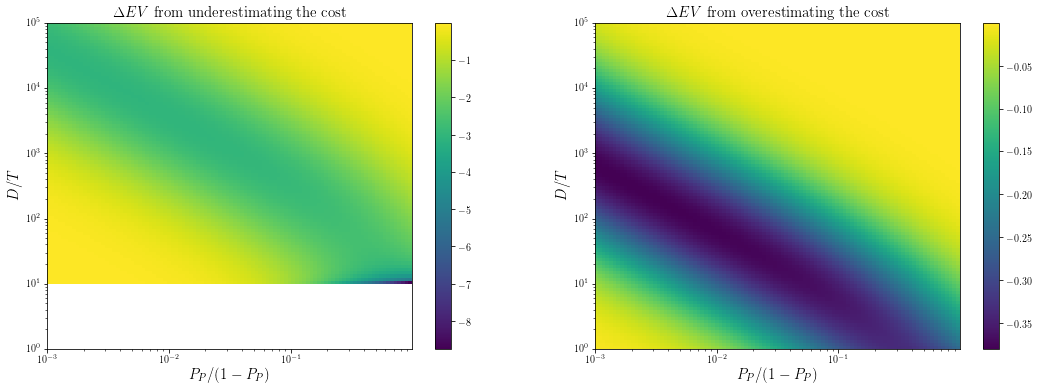

In [21]:
fig = plt.figure(figsize=(18, 6))
fig.add_subplot(1, 2, 1)
plt.pcolor(odds_vals, DTR_vals, (EV_diff_dtr1).T)

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.colorbar()
# plt.contour(Pp_vals, DTR_vals, EV_diff_pp1.T, [0])

plt.ylabel("$D/T$", fontsize=fs)
plt.xlabel("$P_P/(1-P_P)$", fontsize=fs)
plt.title("$\Delta EV$ from underestimating the cost", fontsize=fs)


fig.add_subplot(1, 2, 2)
plt.pcolor(odds_vals, DTR_vals, (EV_diff_dtr2).T)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.colorbar()
# plt.contour(Pp_vals, DTR_vals, EV_diff_pp2.T, [0])

plt.ylabel("$D/T$", fontsize=fs)
plt.xlabel("$P_P/(1-P_P)$", fontsize=fs)
plt.title("$\Delta EV$ from overestimating the cost", fontsize=fs)
